# Домашнее задание

In [138]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import seaborn as sns

from matplotlib import pyplot as plt

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:

In [5]:
# print(load_boston()['DESCR'])

Attribute Information (in order):
 - CRIM     per capita crime rate by town 
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft. 
 - INDUS    proportion of non-retail business acres per town 
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per 10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Параметр CRIM

In [26]:
# sns.distplot(data['CRIM'], 50)
# plt.show()

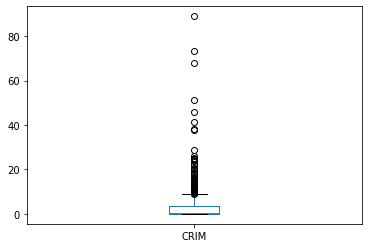

In [11]:
data['CRIM'].plot(kind='box')

In [20]:
# удалим выборосы
data['CRIM'].quantile(0.95)

15.78915

In [21]:
data.shape, data[data['CRIM'] < data['CRIM'].quantile(0.95)].shape

((506, 14), (480, 14))

In [22]:
data = data[data['CRIM'] < data['CRIM'].quantile(0.95)]

In [135]:
# округлим значения до сотых
data.loc[:, 'CRIM'] = data['CRIM'].round(decimals=2)

### Параметр ZN

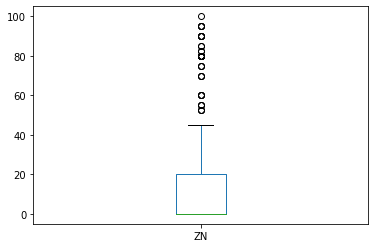

In [32]:
data['ZN'].plot(kind='box')

In [33]:
# удалим выборосы
data['ZN'].quantile(0.95)

80.0

In [34]:
data.shape, data[data['ZN'] < data['ZN'].quantile(0.95)].shape

((480, 14), (451, 14))

In [35]:
data = data[data['ZN'] < data['ZN'].quantile(0.95)]

### Параметр INDUS

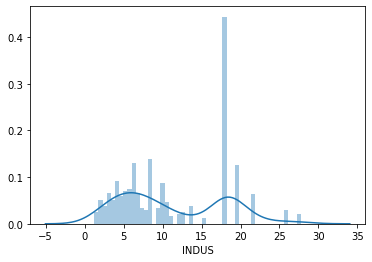

In [46]:
sns.distplot(data['INDUS'], 50)
plt.show()

In [61]:
# data['INDUS'].value_counts()

In [44]:
# удалим значения с малым количеством повторений
small_index = list(data['INDUS'].value_counts()[data['INDUS'].value_counts() < 2].index)

In [45]:
len(data[data['INDUS'].isin(small_index)])

6

In [50]:
data = data[~data['INDUS'].isin(small_index)]

### Параметр CHAS

In [52]:
data['CHAS'].value_counts()

0    411
1     34
Name: CHAS, dtype: int64

### Параметр NOX

In [53]:
data['NOX'].value_counts()

0.5380    22
0.7130    18
0.4370    17
0.8710    16
0.6240    15
          ..
0.4379     2
0.4690     2
0.5750     2
0.4840     2
0.6590     1
Name: NOX, Length: 68, dtype: int64

In [57]:
# округлим значения до сотых
data['NOX'] = data['NOX'].round(decimals=2)

### Параметр RM

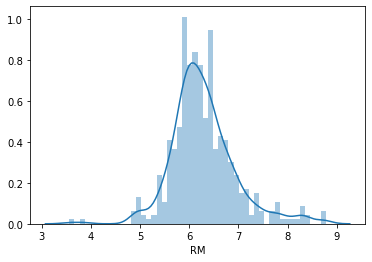

In [75]:
sns.distplot(data['RM'], 50)
plt.show()

In [71]:
data['RM'].value_counts()

6.127    3
6.167    3
6.229    3
6.405    3
6.417    3
        ..
5.468    1
6.335    1
6.037    1
6.027    1
6.625    1
Name: RM, Length: 397, dtype: int64

In [72]:
# округлим значения до сотых
data['RM'] = data['RM'].round(decimals=2)

### Параметр AGE

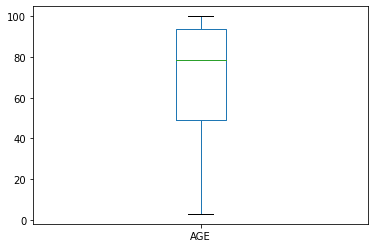

In [78]:
data['AGE'].plot(kind='box')

In [84]:
# удалим выборосы
data['AGE'].quantile(0.03)

10.96

In [85]:
data.shape, data[data['AGE'] > data['AGE'].quantile(0.03)].shape

((445, 14), (431, 14))

In [86]:
data = data[data['AGE'] > data['AGE'].quantile(0.03)]

### Параметр DIS

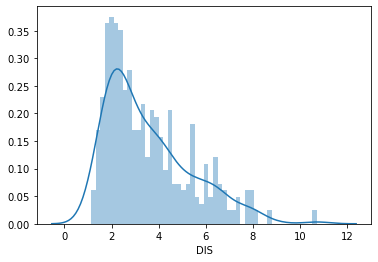

In [87]:
sns.distplot(data['DIS'], 50)
plt.show()

In [89]:
data['DIS'].value_counts()

3.4952    5
5.4007    4
6.8147    4
6.4980    3
7.3172    3
         ..
6.2267    1
2.2625    1
4.0019    1
3.2628    1
1.8125    1
Name: DIS, Length: 361, dtype: int64

In [90]:
# округлим значения до сотых
data['DIS'] = data['DIS'].round(decimals=2)

In [91]:
data['DIS'].value_counts()

5.40    6
3.50    5
1.82    5
4.50    4
3.67    4
       ..
1.91    1
2.85    1
4.27    1
3.84    1
2.46    1
Name: DIS, Length: 252, dtype: int64

### Параметр RAD

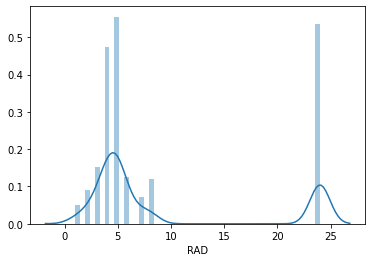

In [95]:
sns.distplot(data['RAD'], 50)
plt.show()

In [100]:
data['RAD'].value_counts()

5     110
24    106
4      94
3      30
6      25
8      24
2      18
7      14
1      10
Name: RAD, dtype: int64

In [101]:
# создадим новый категориальный признак high_RAD 
# 0 - RAD меньше 20; 1 - RAD больше 20
data['high_RAD'] = data.apply(lambda x: 1 if x['RAD']>20 else 0, axis=1)

### Параметр TAX

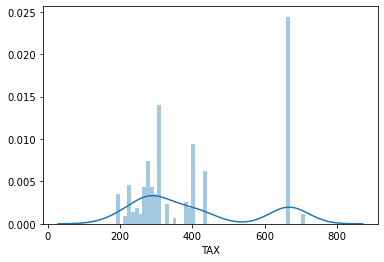

In [113]:
sns.distplot(data['TAX'], 50)
plt.show()

In [114]:
# data['TAX'].value_counts()

In [110]:
# удалим значения с малым количеством повторений
small_index = list(data['TAX'].value_counts()[data['TAX'].value_counts() < 3].index)
len(data[data['TAX'].isin(small_index)])

16

In [111]:
data = data[~data['TAX'].isin(small_index)]

In [117]:
# создадим новый категориальный признак high_TAX
# 0 - TAX меньше 600; 1 - TAX больше 600
data.loc[:, 'high_TAX'] = data.apply(lambda x: 1 if x['TAX']>600 else 0, axis=1)

### Параметр B

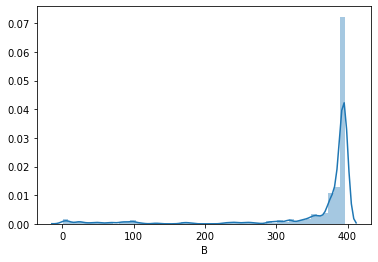

In [119]:
sns.distplot(data['B'], 50)
plt.show()

In [122]:
# удалим выборосы
data['B'].quantile(0.05)

88.44399999999999

In [123]:
data.shape, data[data['B'] > data['B'].quantile(0.05)].shape

((415, 16), (394, 16))

In [124]:
data = data[data['B'] > data['B'].quantile(0.05)]

### Параметр LSTAT

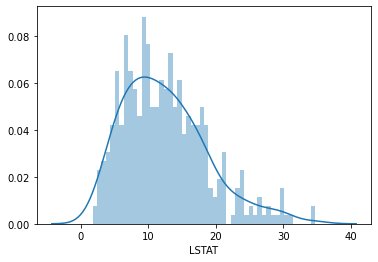

In [126]:
sns.distplot(data['LSTAT'], 50)
plt.show()

# Обучение модели

In [136]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,high_RAD,high_TAX
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4,0,0
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2,0,0
5,0.03,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7,0,0
6,0.09,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43,22.9,0,0
7,0.14,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15,27.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,0,0
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,0,0
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,0,0
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,0,0


In [139]:
# входные данные
X = data.drop(['MEDV'], axis=1)
# вектор целевых значений
y = data['MEDV']

In [140]:
def teach_model(X, y):
    # делим выборку на test и train
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # обучаем модель
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # обучаемое предсказание
    train_predict = lin_reg.predict(X_train)
    test_predict = lin_reg.predict(X_test)

    # сравнение предсказания и реального результата
    print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
    print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))
    print('----------------------------')

    # отсортируем параметры по весам
    sort_ind = np.argsort(np.abs(lin_reg.coef_))[::-1]
    for x, y in zip(lin_reg.coef_[sort_ind], X.columns[sort_ind]):
        print('{}: {}'.format(x, y))
        
teach_model(X, y)

Train MAE: 3.1493030897543335
Test MAE: 3.389320148353138
----------------------------
-18.6917108180301: NOX
-6.492030960515559: high_RAD
3.994120755984952: RM
2.7499765845450743: CHAS
2.450043410960355: high_TAX
-1.643002920864341: DIS
-1.1002006885152755: PTRATIO
-0.5523563789261338: LSTAT
0.5286828230165516: RAD
-0.014387218770942276: TAX
-0.010655497790096148: INDUS
-0.007492092679804647: ZN
0.006594023992050462: B
-0.001840252934184754: AGE
0.001792193107676131: CRIM


In [141]:
row_data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [142]:
# входные данные
X = row_data.drop(['MEDV'], axis=1)
# вектор целевых значений
y = row_data['MEDV']

In [143]:
teach_model(X, y)

Train MAE: 3.377440838376515
Test MAE: 3.1167002230985417
----------------------------
-18.327331093205853: NOX
4.27263009545851: RM
3.397586445356604: CHAS
-1.3745923192521596: DIS
-0.9893996875452356: PTRATIO
-0.5188439361741323: LSTAT
0.2472357745380506: RAD
-0.09248071481330548: CRIM
0.06335489963263162: INDUS
0.03698093952249233: ZN
-0.010843907166925397: TAX
0.005738911285243304: B
-0.0055884919802575445: AGE


Показатель ошибки практически не изменился. С одной стороны небольшой на сырых данных, с другой - преобразования не улучшили его.
Возможно преобразования были не те, что нужно? Какие можно было бы еще применить?